# Birth Rate Analysis
### https://thecleverprogrammer.com/2020/05/08/birth-rate-analysis/

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
births = pd.read_csv(r"https://raw.githubusercontent.com/amankharwal/Birthrate-Analysis/master/births.csv")

In [25]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [26]:
births['day'].fillna(0, inplace=True)
births['day'] = births['day'].astype(int)

In [27]:
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [28]:
births['decade'] = 10 * births['year'] // 10
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
print(births.head())

   year  month  day gender  births  decade
0  1969      1    1      F    4046    1969
1  1969      1    1      M    4440    1969
2  1969      1    2      F    4454    1969
3  1969      1    2      M    4548    1969
4  1969      1    3      F    4548    1969


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

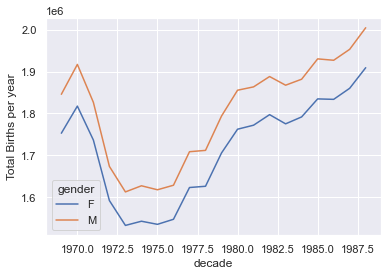

In [30]:
birth_decade = data.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
birth_decade.plot()
plt.ylabel("Total Births per year")
plt.show()

In [32]:
import numpy as np
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])  # sigma-clipping operation

In [36]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

<ipython-input-39-35c3d29e761d>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


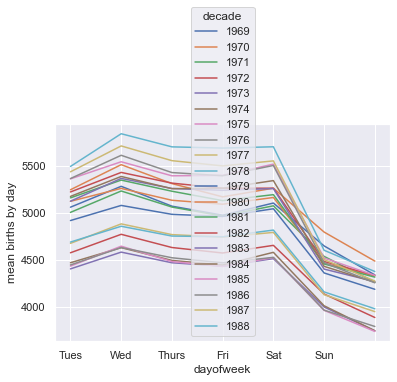

In [39]:
births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');
plt.show()